In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb; sb.set()
import datetime

# Highlights
1. Pivot table function parameters
2. `pd.cut(*series/ column*, *list of cutoffs*)`
2. `pd.qcut(*series/ column*, *number of points to cut. Will cut uniformly*)`
3. `np.percentile(*series/ column*, *list of p-th to return*)`
4. `*series*.astype(*data type*)`

In [89]:
titanic = sb.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Pivot Table Structure
**Same as `groupby`** except that it is cleaner and can group *multidimensional data*
1. data! : `data` for `pd.pivot_table(data, ...)`. If not, `data.pivot_table()`
2. metric to aggregate: `values`
3. fields to group by: `index` and `columns`
4. Aggregation function: `aggfunc` could be a dictionary, just a string, or the function
4. handling nan values: `fill_value=None`, `dropna=True`
5. margins at the end of the table: `margins=False`, `margins_name='All'`

In [90]:
titanic.pivot_table(values='survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [91]:
# Multilevel pivot tables
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [92]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', index=['sex', age], columns = [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [93]:
titanic.pivot_table(index = 'sex', columns = 'class', aggfunc = {'fare': 'mean', 'survived': np.sum})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [94]:
titanic.pivot_table('survived', 'sex', 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Unpivot with `melt()`
1. `id_vars`: which column should I maintain?
2. `value_vars`: which columns should the values be shown? Rename column to `variable`, values in the column as `value`
3. `var_name`: rename `variable` column
4. `value_name`: rename `value` column
5. `ignore_index`: forget about the indices
6. `col_level`: melt which level if there is multiIndex

In [95]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                   'B': {0: 1, 1: 3, 2: 5},
                   'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [96]:
pd.melt(df, id_vars='A', value_vars=['B', 'C'], var_name='char', value_name = 'just_value')

,A,char,just_value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


In [97]:
df.columns = [list('ABC'), list('DEF')]
df

,A,B,C
,D,E,F
0,a,1,2
1,b,3,4
2,c,5,6


In [98]:
pd.melt(df, col_level=0, id_vars=['A'], value_vars=['B'])

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5


In [99]:
pd.melt(df, id_vars=[('A', 'D')], value_vars=[('B', 'E')], var_name = ['var1', 'var2'])

,"(A, D)",var1,var2,value
0,a,B,E,1
1,b,B,E,3
2,c,B,E,5


# Mock Test: Birthrate Data

In [100]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [101]:
# Add decade column
births['decade'] = 10*(births['year'] // 10)

In [102]:
# M/F births as f(decade)
pd.DataFrame.pivot_table(births, values = 'births', index = 'decade', columns = 'gender', aggfunc='sum')

# Notice that Groupby achieves the same effect, but as indicated at the beginning, pivot table is cleaner
# births.groupby(['decade', 'gender'])['births'].sum().unstack()
# births.groupby(['decade', 'gender']).aggregate({'births': 'sum'}).unstack()

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0, 0.5, 'total births per year')

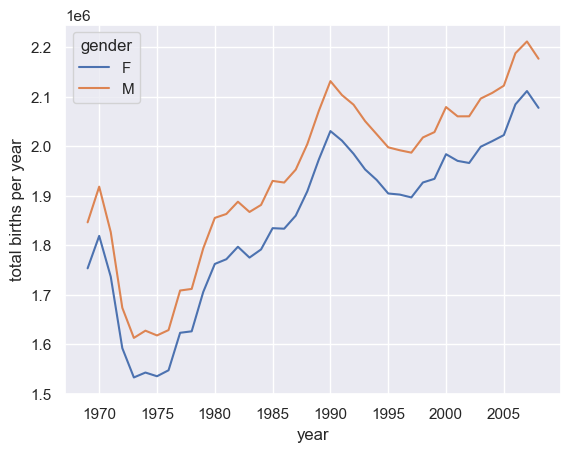

In [103]:
# Total number of births by year
births.pivot_table('births', index = 'year', columns = 'gender', aggfunc = sum).plot()
plt.ylabel('total births per year')

In [104]:
# Clean data: Remove outliers with sigma-clipping operation
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 *(quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5*@sig) & (births < @mu + 5*@sig)')

# Alternative method: logical op like '&' must have spaces around!
# births = births.loc[(births['births'] > mu - 5 * sig) & (births['births'] < mu + 5 * sig)]


# set day column to integers. Previously string type due to presence of null values
births['day'].astype(int)

# Create Date index (time series) for easier manipulation
births.index = pd.to_datetime(10000*births.year + 100*births.month + births.day, format = '%Y%m%d')

# create dayofweek column
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1.0,F,4046,1960,2
1969-01-01,1969,1,1.0,M,4440,1960,2
1969-01-02,1969,1,2.0,F,4454,1960,3
1969-01-02,1969,1,2.0,M,4548,1960,3
1969-01-03,1969,1,3.0,F,4548,1960,4


C:\Users\oongj\AppData\Local\Temp\ipykernel_14976\841536706.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


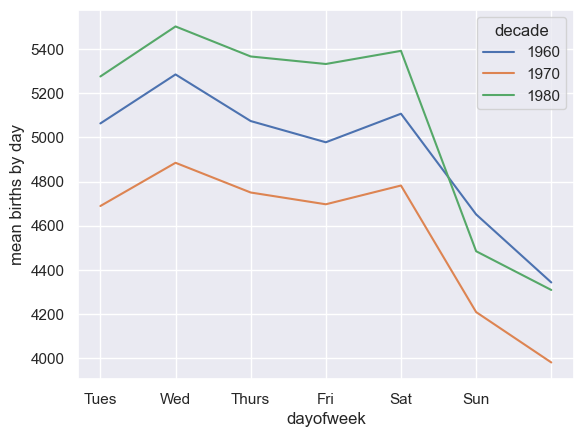

In [105]:
# Plot births by weekday for several decades
births.pivot_table('births', index = 'dayofweek', columns = ['decade'], aggfunc = 'mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [106]:
# mean number of births by the day of the year
births_by_date = births.pivot_table('births', index = [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [107]:
# Plot it out. Hence, give a dummy leap year
births_by_date.index = [datetime.datetime(2020, month, day) for (month, day) in births_by_date.index]

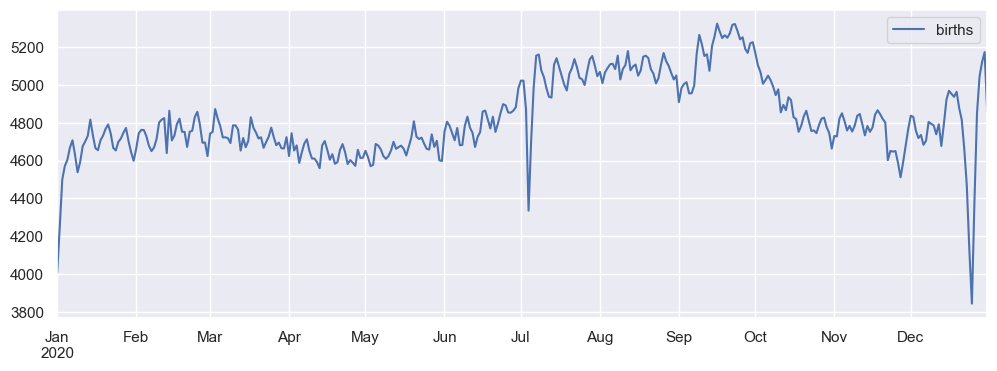

In [108]:
f, axes = plt.subplots(figsize = (12, 4))
births_by_date.plot(ax = axes);